In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple
from scipy.optimize import curve_fit

In [ ]:
#!pip install astropy

                X           Y
count  106.000000  106.000000
mean    -6.447343    1.100501
std      3.845383    2.987507
min    -14.049790   -2.763160
25%     -9.565758   -2.051525
50%     -6.371515    1.160395
75%     -3.177262    4.181658
max      0.000000    5.118920


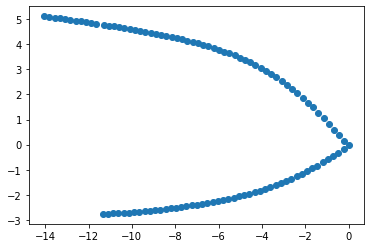

In [57]:
file_path=pressure_filePath="../data_input/pattern_left.txt"
pattern_left = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_left["X"]= pattern_left["X"]-pattern_left["X"][0]
pattern_left["Y"]= pattern_left["Y"]-pattern_left["Y"][0]
pattern_left 
print(pattern_left.describe())
plt.scatter(x=pattern_left["X"],y=pattern_left["Y"])

In [1]:
# pattern_left_top

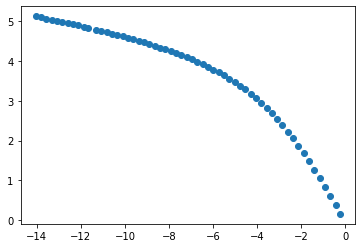

In [25]:
pattern_left_top=pattern_left.loc[pattern_left["Y"]>0]
pattern_left_top
plt.scatter(x=pattern_left_top["X"],y=pattern_left_top["Y"])

The value of epsilon is [ 0.35467015 -0.74071293 -0.03003144] wavenumbers.


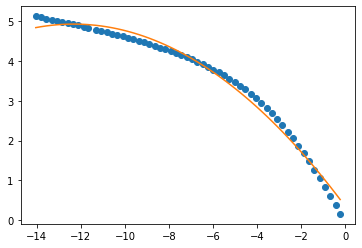

In [30]:
xdata=pattern_left_top["X"]
ydata=pattern_left_top["Y"]
x = np.asarray(xdata)
y = np.asarray(ydata)

def test_func(x, a,b,c):
    y = a+b*x+c*x*x
    return y

parameters, covariance = curve_fit(test_func, x, y)

fit_a = parameters[0]
fit_b = parameters[1]
fit_c = parameters[2]

print(F'The value of epsilon is {parameters} wavenumbers.')


y_fit = test_func(x, fit_a, fit_b,fit_c)

plt.plot(x, y, 'o', label='data')
plt.plot(x, y_fit, '-', label='LJ fit')

The value of epsilon is [ 4.12959938 -0.07459858  4.31571225  0.27952833] wavenumbers.


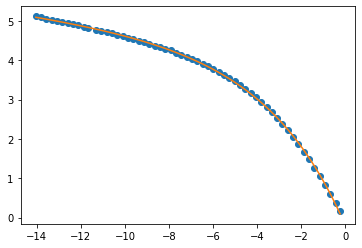

In [59]:
xdata=pattern_left_top["X"]
ydata=pattern_left_top["Y"]
x = np.asarray(xdata)
y = np.asarray(ydata)

def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y

parameters, covariance = curve_fit(test_func, x, y)

fit_a = parameters[0]
fit_b = parameters[1]
fit_c = parameters[2]
fit_d = parameters[3]

print(F'The parameters is {parameters}.')


y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

plt.plot(x, y, 'o', label='data')
plt.plot(x, y_fit, '-', label='LJ fit')

The value of epsilon is [-3.00297354e+00 -3.35921627e-04 -2.99822437e+00  2.29392013e-01] wavenumbers.


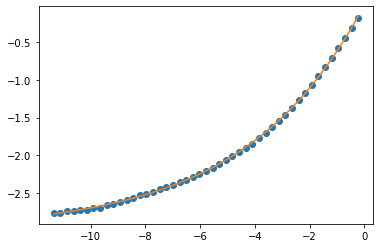

In [60]:
xdata=pattern_left_bottom["X"]
ydata=pattern_left_bottom["Y"]
x = np.asarray(xdata)
y = np.asarray(ydata)

def test_func(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y

parameters, covariance = curve_fit(test_func, x, y)

fit_a = parameters[0]
fit_b = parameters[1]
fit_c = parameters[2]
fit_d = parameters[3]

print(F'The parameters is {parameters}.')


y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

plt.plot(x, y, 'o', label='data')
plt.plot(x, y_fit, '-', label='LJ fit')

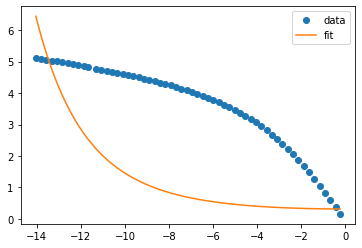

In [31]:
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

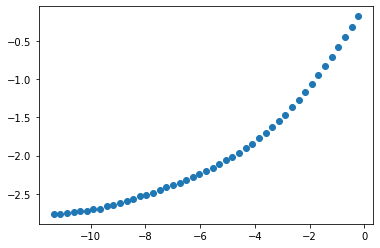

In [28]:
pattern_left_bottom=pattern_left.loc[pattern_left["Y"]<0]
pattern_left_bottom
plt.scatter(x=pattern_left_bottom["X"],y=pattern_left_bottom["Y"])

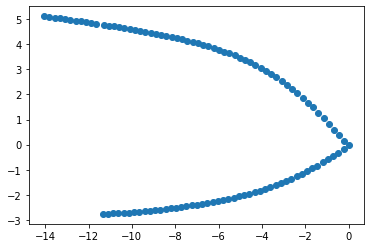

In [4]:
xdata = pattern_left["X"]
ydata =pattern_left["Y"]

#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

In [5]:
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

In [6]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

0.3149957776990329
-0.015289080570825717


C:\Users\junec\AppData\Local\Temp/ipykernel_20172/4020519507.py:3: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


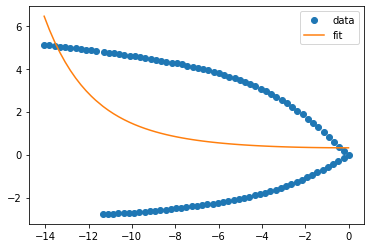

In [7]:
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

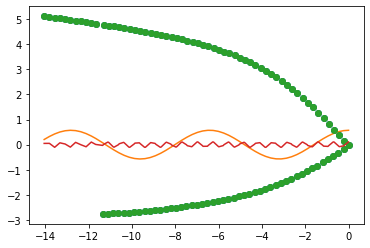

In [11]:
def cos_func(x, D, E):
    y = D*np.cos(E*x)
    return y

parameters, covariance = curve_fit(cos_func, xdata, ydata)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

guess = [8, 9]
parameters, covariance = curve_fit(cos_func, xdata, ydata, p0=guess)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(xdata, fit_D, fit_E)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.savefig('03-cosine_fit2.png')

The value of epsilon is 1.000 wavenumbers.
The value of sigma is 1.000 angstroms.


C:\Users\junec\AppData\Local\Temp/ipykernel_20172/236839395.py:5: RuntimeWarning: divide by zero encountered in true_divide
  V = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
C:\Users\junec\AppData\Local\Temp/ipykernel_20172/236839395.py:5: RuntimeWarning: invalid value encountered in subtract
  V = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


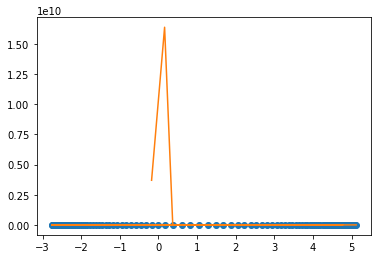

The value of epsilon is [-0.48132267  1.17058966 -0.72166569] wavenumbers.


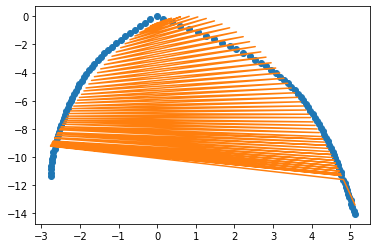

In [16]:
y = np.asarray(xdata)
x = np.asarray(ydata)

def test_func(x, a,b,c):
    y = a+b*x+c*x*x
    return y

parameters, covariance = curve_fit(test_func, x, y)

fit_a = parameters[0]
fit_b = parameters[1]
fit_c = parameters[2]

print(F'The value of epsilon is {parameters} wavenumbers.')


y_fit = test_func(x, fit_a, fit_b,fit_c)

plt.plot(x, y, 'o', label='data')
plt.plot(x, y_fit, '-', label='LJ fit')

You should consider upgrading via the 'c:\users\junec\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [35]:
from astropy.modeling import models
from astropy.modeling import fitting

In [ ]:
models.

In [32]:
models.Sersic1D


<class 'astropy.modeling.functional_models.Sersic1D'>
Name: Sersic1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'r_eff', 'n')

In [53]:
models.Sersic1D(x)

<Sersic1D(amplitude=[ -0.22518,  -0.42638,  -0.66822,  -0.91006,  -1.15189,  -1.39373, -1.63556,  -1.8774 ,  -2.11923,  -2.36107,  -2.6029 ,  -2.84474, -3.08658,  -3.32841,  -3.57025,  -3.81208,  -4.05392,  -4.29575, -4.53759,  -4.77943,  -5.02126,  -5.2631 ,  -5.50493,  -5.74677, -5.9886 ,  -6.23044,  -6.47228,  -6.71411,  -6.95595,  -7.19778, -7.43962,  -7.68145,  -7.92329,  -8.16513,  -8.40696,  -8.6488 , -8.89063,  -9.13247,  -9.3743 ,  -9.61614,  -9.85797, -10.09981, -10.34165, -10.58348, -10.82532, -11.06715, -11.30899, -11.67174, -11.87327, -12.11511, -12.35694, -12.59878, -12.84061, -13.08245, -13.32429, -13.56612, -13.80796, -14.04979], r_eff=1., n=4.)>

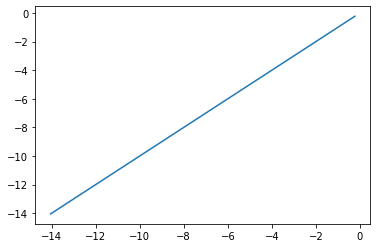

In [50]:
models.Sersic1D(amplitude=1,r_eff=1,n=4)
plt.plot(x, models.Sersic1D(x).amplitude.value, '-', label='LJ fit')

In [49]:
models.Sersic1D(x).amplitude.value

array([ -0.22518,  -0.42638,  -0.66822,  -0.91006,  -1.15189,  -1.39373,
        -1.63556,  -1.8774 ,  -2.11923,  -2.36107,  -2.6029 ,  -2.84474,
        -3.08658,  -3.32841,  -3.57025,  -3.81208,  -4.05392,  -4.29575,
        -4.53759,  -4.77943,  -5.02126,  -5.2631 ,  -5.50493,  -5.74677,
        -5.9886 ,  -6.23044,  -6.47228,  -6.71411,  -6.95595,  -7.19778,
        -7.43962,  -7.68145,  -7.92329,  -8.16513,  -8.40696,  -8.6488 ,
        -8.89063,  -9.13247,  -9.3743 ,  -9.61614,  -9.85797, -10.09981,
       -10.34165, -10.58348, -10.82532, -11.06715, -11.30899, -11.67174,
       -11.87327, -12.11511, -12.35694, -12.59878, -12.84061, -13.08245,
       -13.32429, -13.56612, -13.80796, -14.04979])

The value of epsilon is [1. 1. 4.] wavenumbers.


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\astropy\modeling\functional_models.py:751: RuntimeWarning: invalid value encountered in power
  -cls._gammaincinv(2 * n, 0.5) * ((r / r_eff) ** (1 / n) - 1)))
c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\astropy\modeling\functional_models.py:751: RuntimeWarning: invalid value encountered in power
  -cls._gammaincinv(2 * n, 0.5) * ((r / r_eff) ** (1 / n) - 1)))


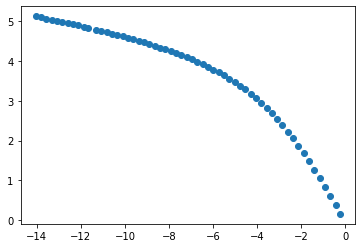

In [42]:
xdata=pattern_left_top["X"]
ydata=pattern_left_top["Y"]
x = np.asarray(xdata)
y = np.asarray(ydata)
x = pattern_left_top["X"]
y = pattern_left_top["Y"]

test_model=models.Sersic1D()
fitter=fitting.LevMarLSQFitter()
model=fitter(test_model,x,y)


# fit_a = parameters[0]
# fit_b = parameters[1]
# fit_c = parameters[2]

print(F'The value of epsilon is {model.parameters} wavenumbers.')

plt.plot(x, y, 'o', label='data')
plt.plot(x, model(x), '-', label='LJ fit')

In [52]:
print(model)

Model: Sersic1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude r_eff  n 
    --------- ----- ---
          1.0   1.0 4.0
